<a href="https://colab.research.google.com/github/gautamprafful007/ML-project-credit_risk_analysis_model/blob/main/Credit_Risk_Analysis(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn # Changed from scikitlearn
from sklearn.model_selection import train_test_split
import math

pd.set_option('display.float_format',lambda x: '{:.2f}'.format(x))
np.set_printoptions(suppress=True)

In [4]:
df_customers=pd.read_csv("customers.csv")
df_bureau=pd.read_csv("bureau_data.csv")
df_loans=pd.read_csv("loans.csv")

In [5]:
df_customers.shape,df_bureau.shape,df_loans.shape

((50000, 12), (50000, 8), (50000, 15))

In [6]:
df_customers.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001


In [7]:
df_bureau.head(3)

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58


In [8]:
df=pd.merge(df_customers,df_bureau,on='cust_id')
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001,2,1,82,24,147,6,58


In [9]:
df_loans.head(3)

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [10]:
df=pd.merge(df,df_loans,on='cust_id')
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [11]:
df.shape

(50000, 33)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  number_of_open_accounts      50000 non-null  int64  
 13  number_of_closed

In [13]:
df['default']=df['default'].astype(int)
df.default.value_counts()

,count
default,
0,45703
1,4297


In [14]:
df.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,0
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,0


In [15]:
X=df.drop(['default'],axis=1)
y=df['default']

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.25,random_state=42)

In [16]:
df_train=pd.concat([X_train,y_train],axis=1)
df_test=pd.concat([X_test,y_test],axis=1)


In [17]:
df_train.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,23442000,468840.00,4219560,18753600,28,5000000,4820526,2020-10-31,2020-11-11,0
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,1149000,22980.00,206820,919200,50,467229,216697,2022-10-22,2022-10-27,0
43675,C43676,38,M,Single,Salaried,3195000,0,Mortgage,26,Chennai,...,11296000,225920.00,2033280,9036800,32,1656773,1383842,2023-12-04,2023-12-29,0
9040,C09041,42,M,Married,Salaried,1500000,2,Mortgage,30,Bangalore,...,1695000,33900.00,305100,1356000,40,1023442,626203,2020-06-18,2020-07-07,0
13077,C13078,58,M,Married,Self-Employed,1817000,4,Owned,29,Pune,...,905000,18100.00,162900,724000,15,651599,585099,2020-11-12,2020-12-07,0


In [18]:
df_train.shape,df_test.shape

((37500, 33), (12500, 33))

In [19]:
df_train.isna().sum()

,0
cust_id,0
age,0
gender,0
marital_status,0
employment_status,0
income,0
number_of_dependants,0
residence_type,47
years_at_current_address,0
city,0


In [20]:
df_train['residence_type'].unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [21]:
df_train['residence_type'].mode()

,residence_type
0,Owned


In [22]:
df_train['residence_type'].fillna("Owned",inplace=True)

/tmp/ipython-input-2003823549.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['residence_type'].fillna("Owned",inplace=True)


In [23]:
df_train['residence_type'].unique()

array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [24]:
df_test.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [25]:
df_test.residence_type.mode()

,residence_type
0,Owned


In [26]:
df_test.residence_type.fillna("Owned",inplace=True)

/tmp/ipython-input-3865372431.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test.residence_type.fillna("Owned",inplace=True)


In [27]:
df_test.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [28]:
df_train.duplicated().sum()

np.int64(0)

In [29]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio', 'loan_id', 'loan_purpose', 'loan_type',
       'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'disbursal_date', 'installment_start_dt',
       'default'],
      dtype='object')

In [30]:
columns_continuous = ['age', 'income', 'number_of_dependants', 'years_at_current_address',
                      'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement',
                      'loan_tenure_months','principal_outstanding', 'bank_balance_at_application',
                      'number_of_open_accounts','number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
                       'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

columns_categorical = ['gender', 'marital_status', 'employment_status', 'residence_type', 'city',
                       'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']

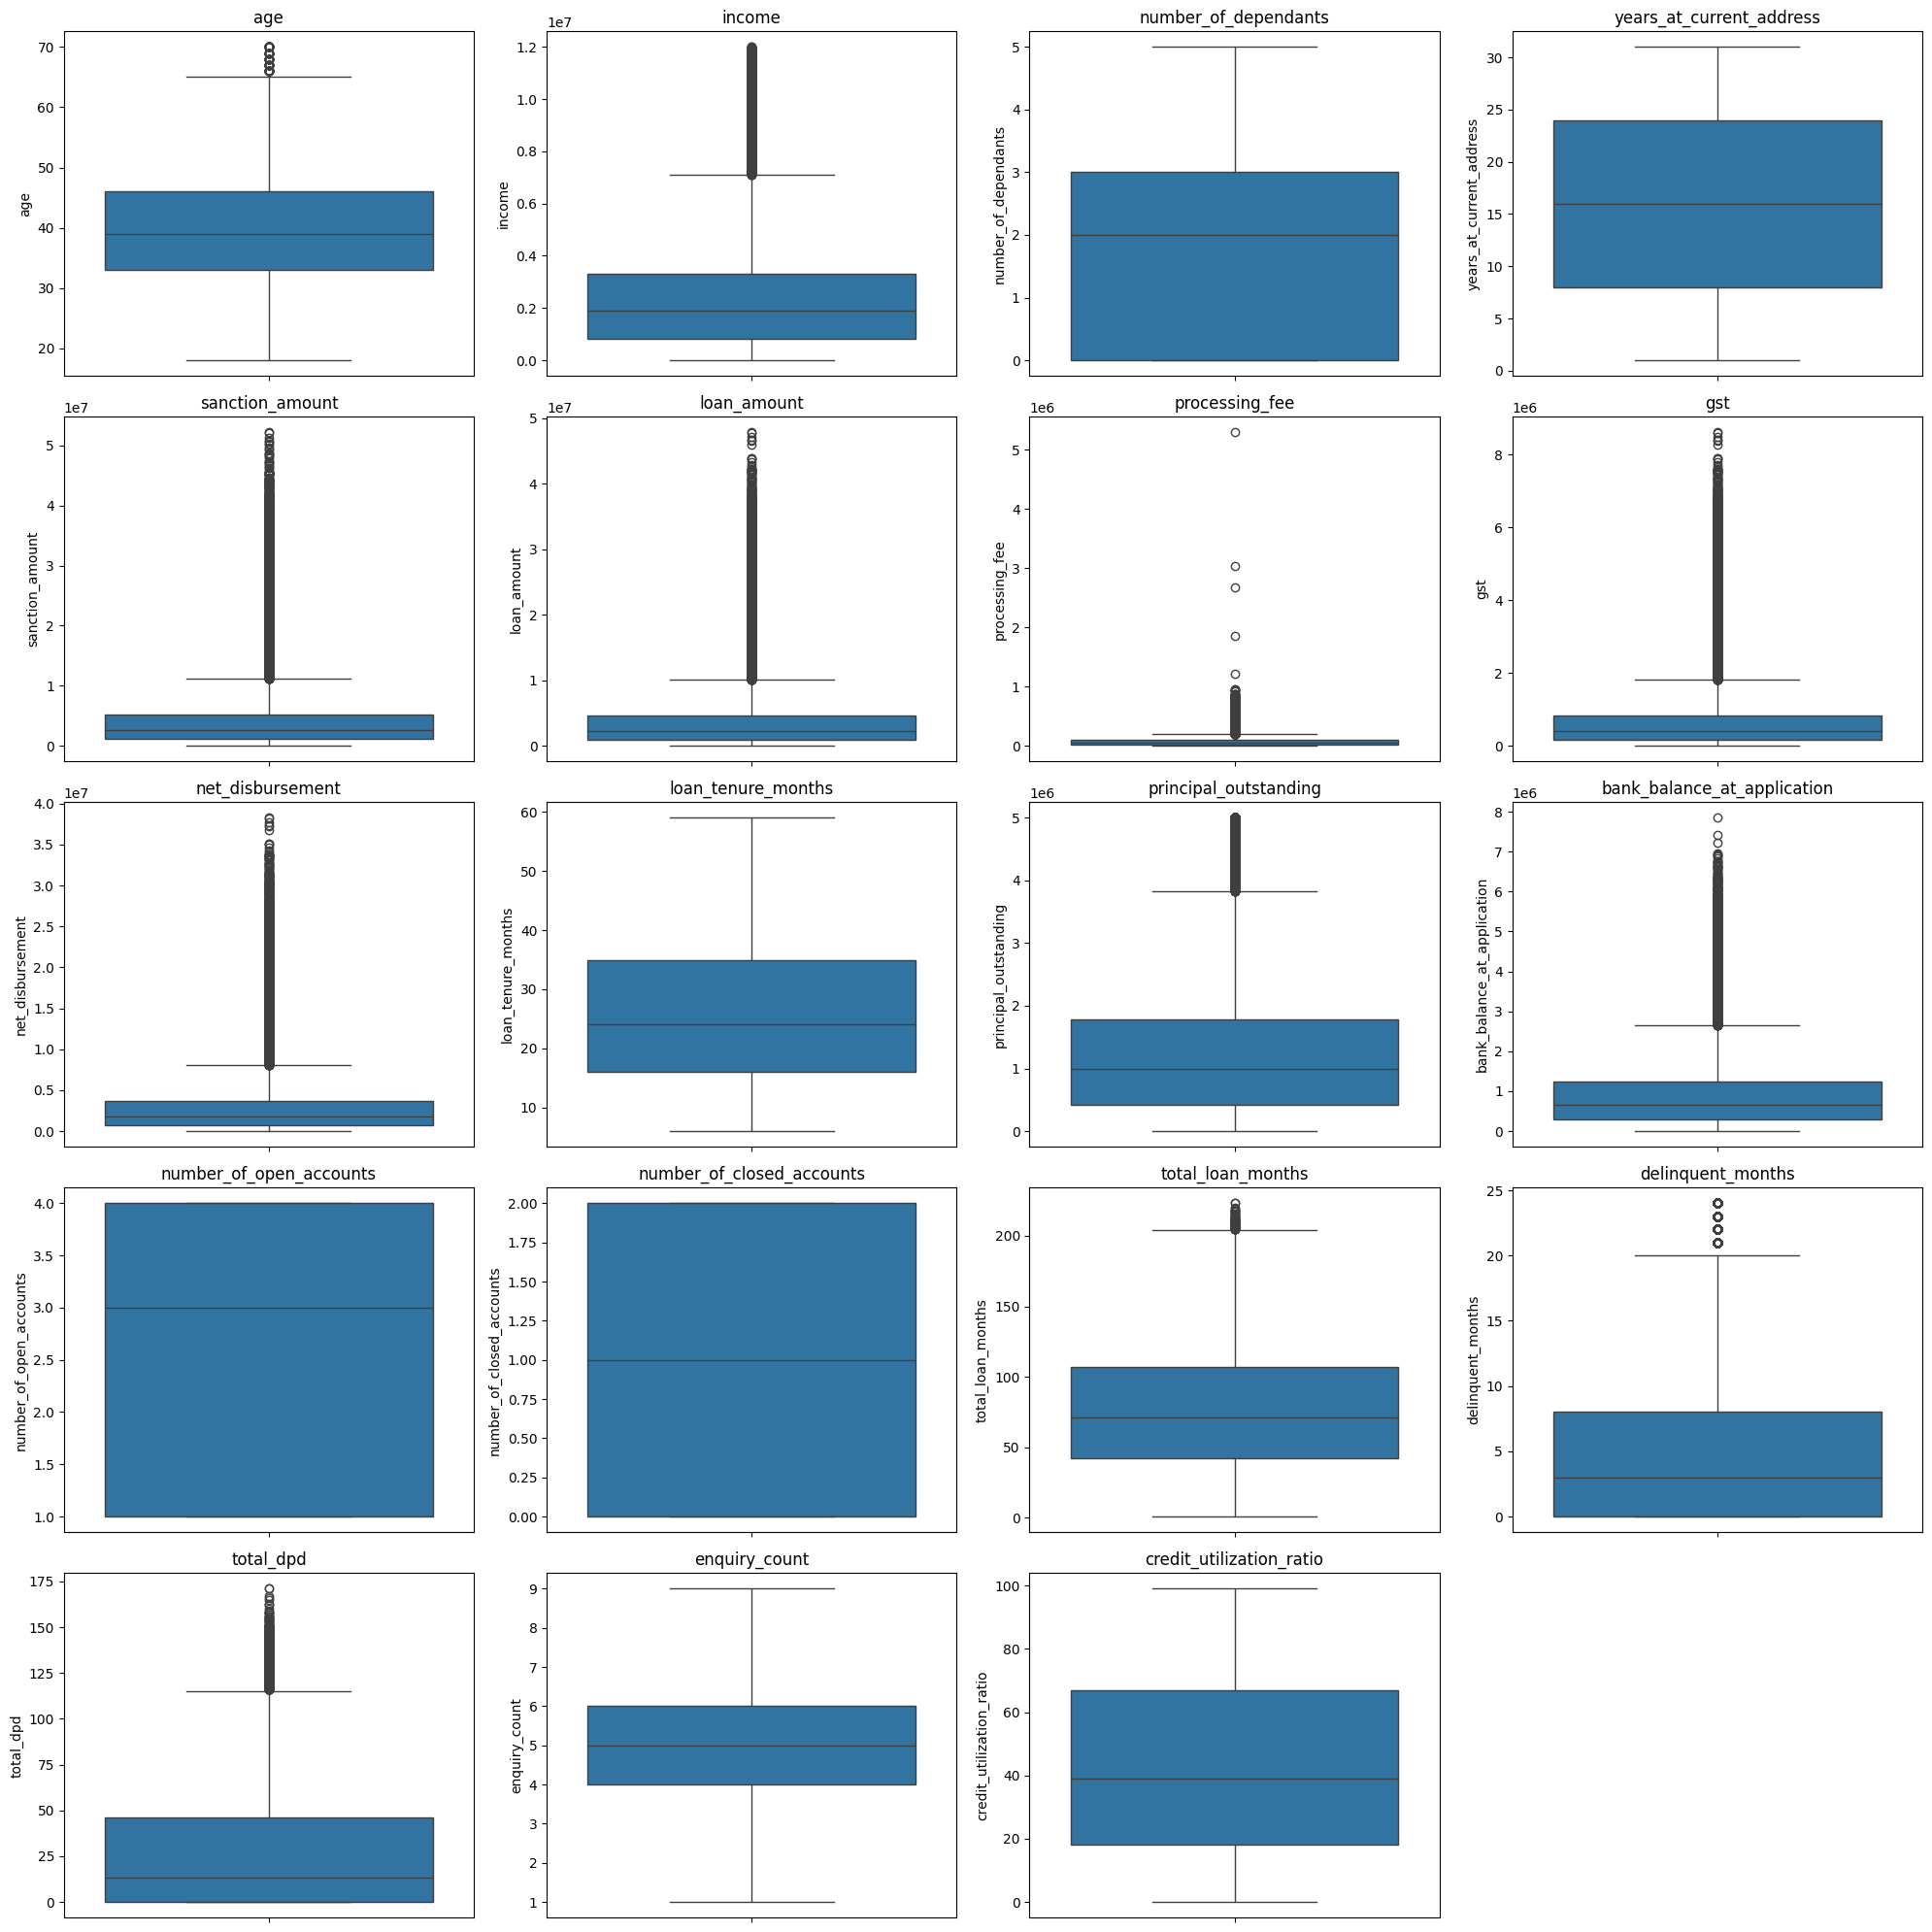

In [31]:
# Number of features
num_features = len(columns_continuous)

# Set number of plots per row
plots_per_row = 4

# Calculate number of rows needed
num_rows = math.ceil(num_features / plots_per_row)

# Set figure size: adjust (width, height) per your preference
plt.figure(figsize=(plots_per_row * 5, num_rows * 4))

# Create subplots
for i, col in enumerate(columns_continuous, 1):
    plt.subplot(num_rows, plots_per_row, i)
    sns.boxplot(data=df_train, y=col)
    plt.title(col)
    plt.tight_layout()

plt.show()

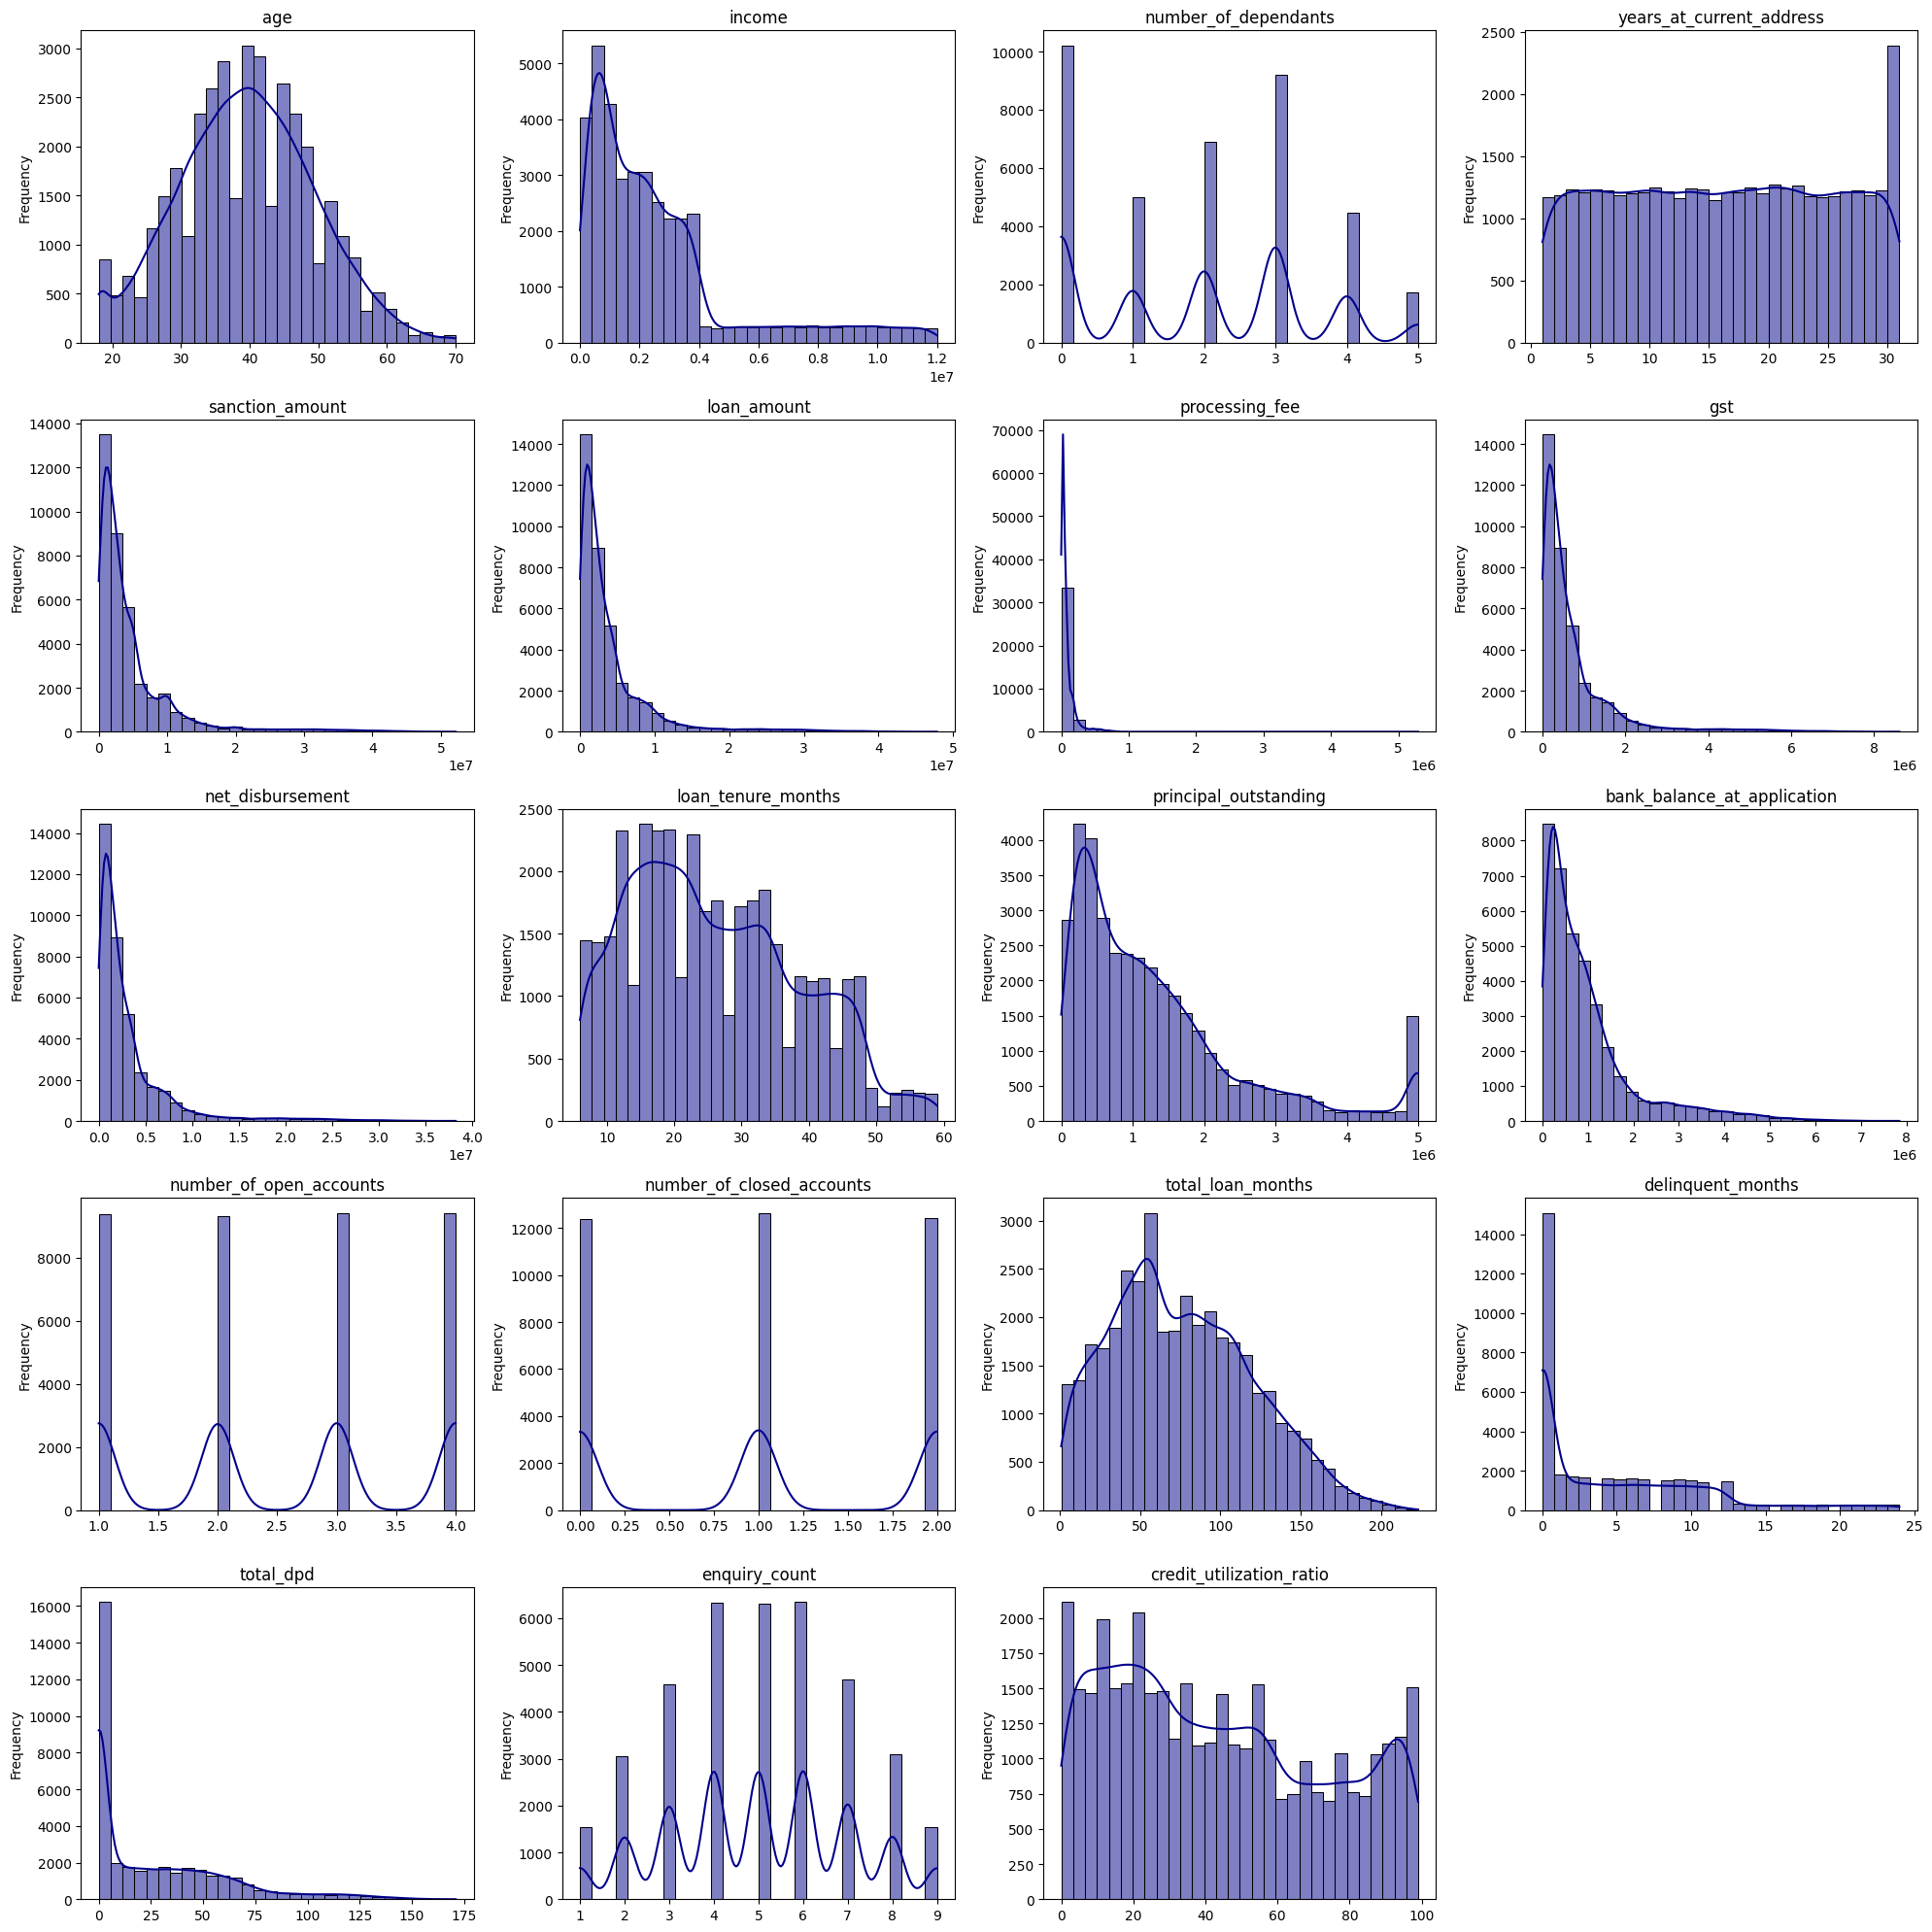

In [32]:

# Number of continuous features
num_features = len(columns_continuous)

# Number of plots per row
plots_per_row = 4

# Calculate number of rows
num_rows = math.ceil(num_features / plots_per_row)

# Set figure size (adjust as needed)
plt.figure(figsize=(plots_per_row * 5, num_rows * 4))

# Plot histograms
for i, col in enumerate(columns_continuous, 1):
    plt.subplot(num_rows, plots_per_row, i)
    sns.histplot(df_train[col], kde=True, bins=30, color='darkblue')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [33]:
df_train.processing_fee.describe()

,processing_fee
count,37500.00
mean,80290.68
std,113128.14
min,0.00
25%,19220.00
50%,44600.00
75%,92420.00
max,5293543.52


In [34]:
df_train[(df_train.processing_fee/df_train.loan_amount)>0.03][['loan_amount','processing_fee']]

,loan_amount,processing_fee
23981,2234000,2669791.02
28174,966000,1214492.67
47089,1738000,1858964.77
29305,2616000,3036378.01
9898,3626000,5293543.52


In [35]:
df_train_1=df_train[(df_train.processing_fee/df_train.loan_amount)<0.03].copy()
df_train_1[(df_train_1.processing_fee/df_train_1.loan_amount)>0.03][['loan_amount','processing_fee']]

,loan_amount,processing_fee


In [36]:
df_test_1=df_test[(df_test.processing_fee/df_test.loan_amount)<0.03].copy()
df_test_1[(df_test_1.processing_fee/df_test_1.loan_amount)>0.03][['loan_amount','processing_fee']]

,loan_amount,processing_fee


In [37]:
df_test_1.shape

(12497, 33)

In [38]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [39]:
for col in columns_categorical:
  print(col,"-->",df_train_1[col].unique())

gender --> ['M' 'F']
marital_status --> ['Married' 'Single']
employment_status --> ['Self-Employed' 'Salaried']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state --> ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
zipcode --> [500001 400001 600001 560001 411001 700001 380001 110001 226001 302001]
loan_purpose --> ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type --> ['Secured' 'Unsecured']
default --> [0 1]


In [40]:
df_train_1['loan_purpose']=df_train_1['loan_purpose'].replace("Personaal","Personal")
df_test_1['loan_purpose']=df_test_1['loan_purpose'].replace("Personaal","Personal")

In [41]:
for col in columns_categorical:
  print(col,"-->",df_train_1[col].unique())

gender --> ['M' 'F']
marital_status --> ['Married' 'Single']
employment_status --> ['Self-Employed' 'Salaried']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state --> ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
zipcode --> [500001 400001 600001 560001 411001 700001 380001 110001 226001 302001]
loan_purpose --> ['Home' 'Education' 'Personal' 'Auto']
loan_type --> ['Secured' 'Unsecured']
default --> [0 1]


**Exploratory Data Analysis**

In [42]:
columns_continuous

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

<Axes: xlabel='age', ylabel='Count'>

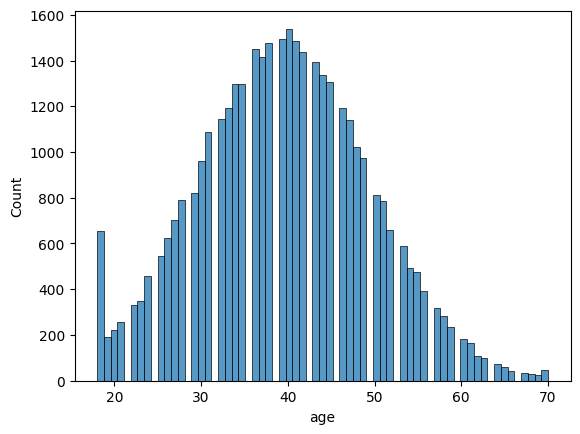

In [43]:
sns.histplot(df_train_1.age,fill=True)

<Axes: xlabel='age', ylabel='Density'>

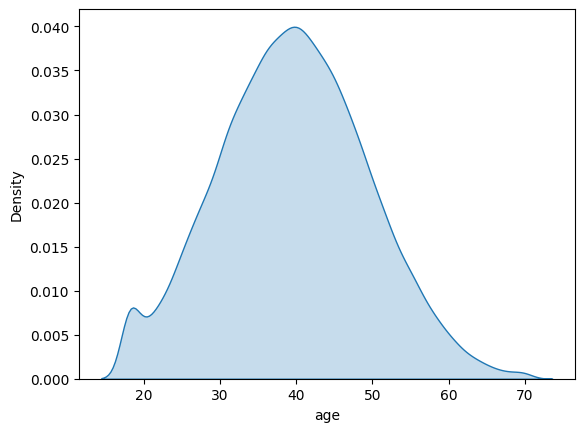

In [44]:
sns.kdeplot(df_train_1.age,fill=True)

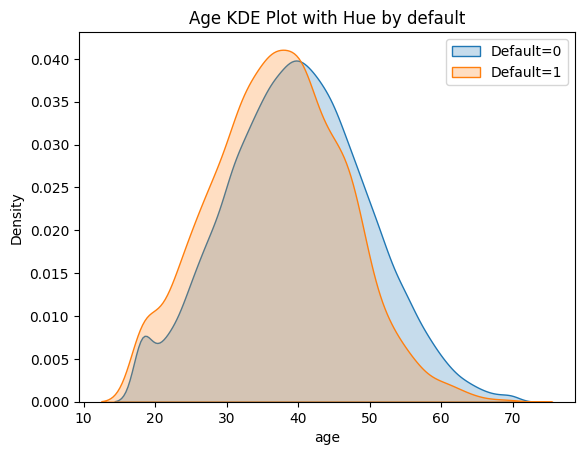

In [45]:
sns.kdeplot(df_train_1[df_train_1.default==0]['age'],fill=True,label="Default=0")
sns.kdeplot(df_train_1[df_train_1.default==1]['age'],fill=True,label="Default=1")
plt.title("Age KDE Plot with Hue by default")
plt.legend()
plt.show()

**Insights**

1.Orange graph is little bit shifted to left side which indicates that young people are more likely to default than old people


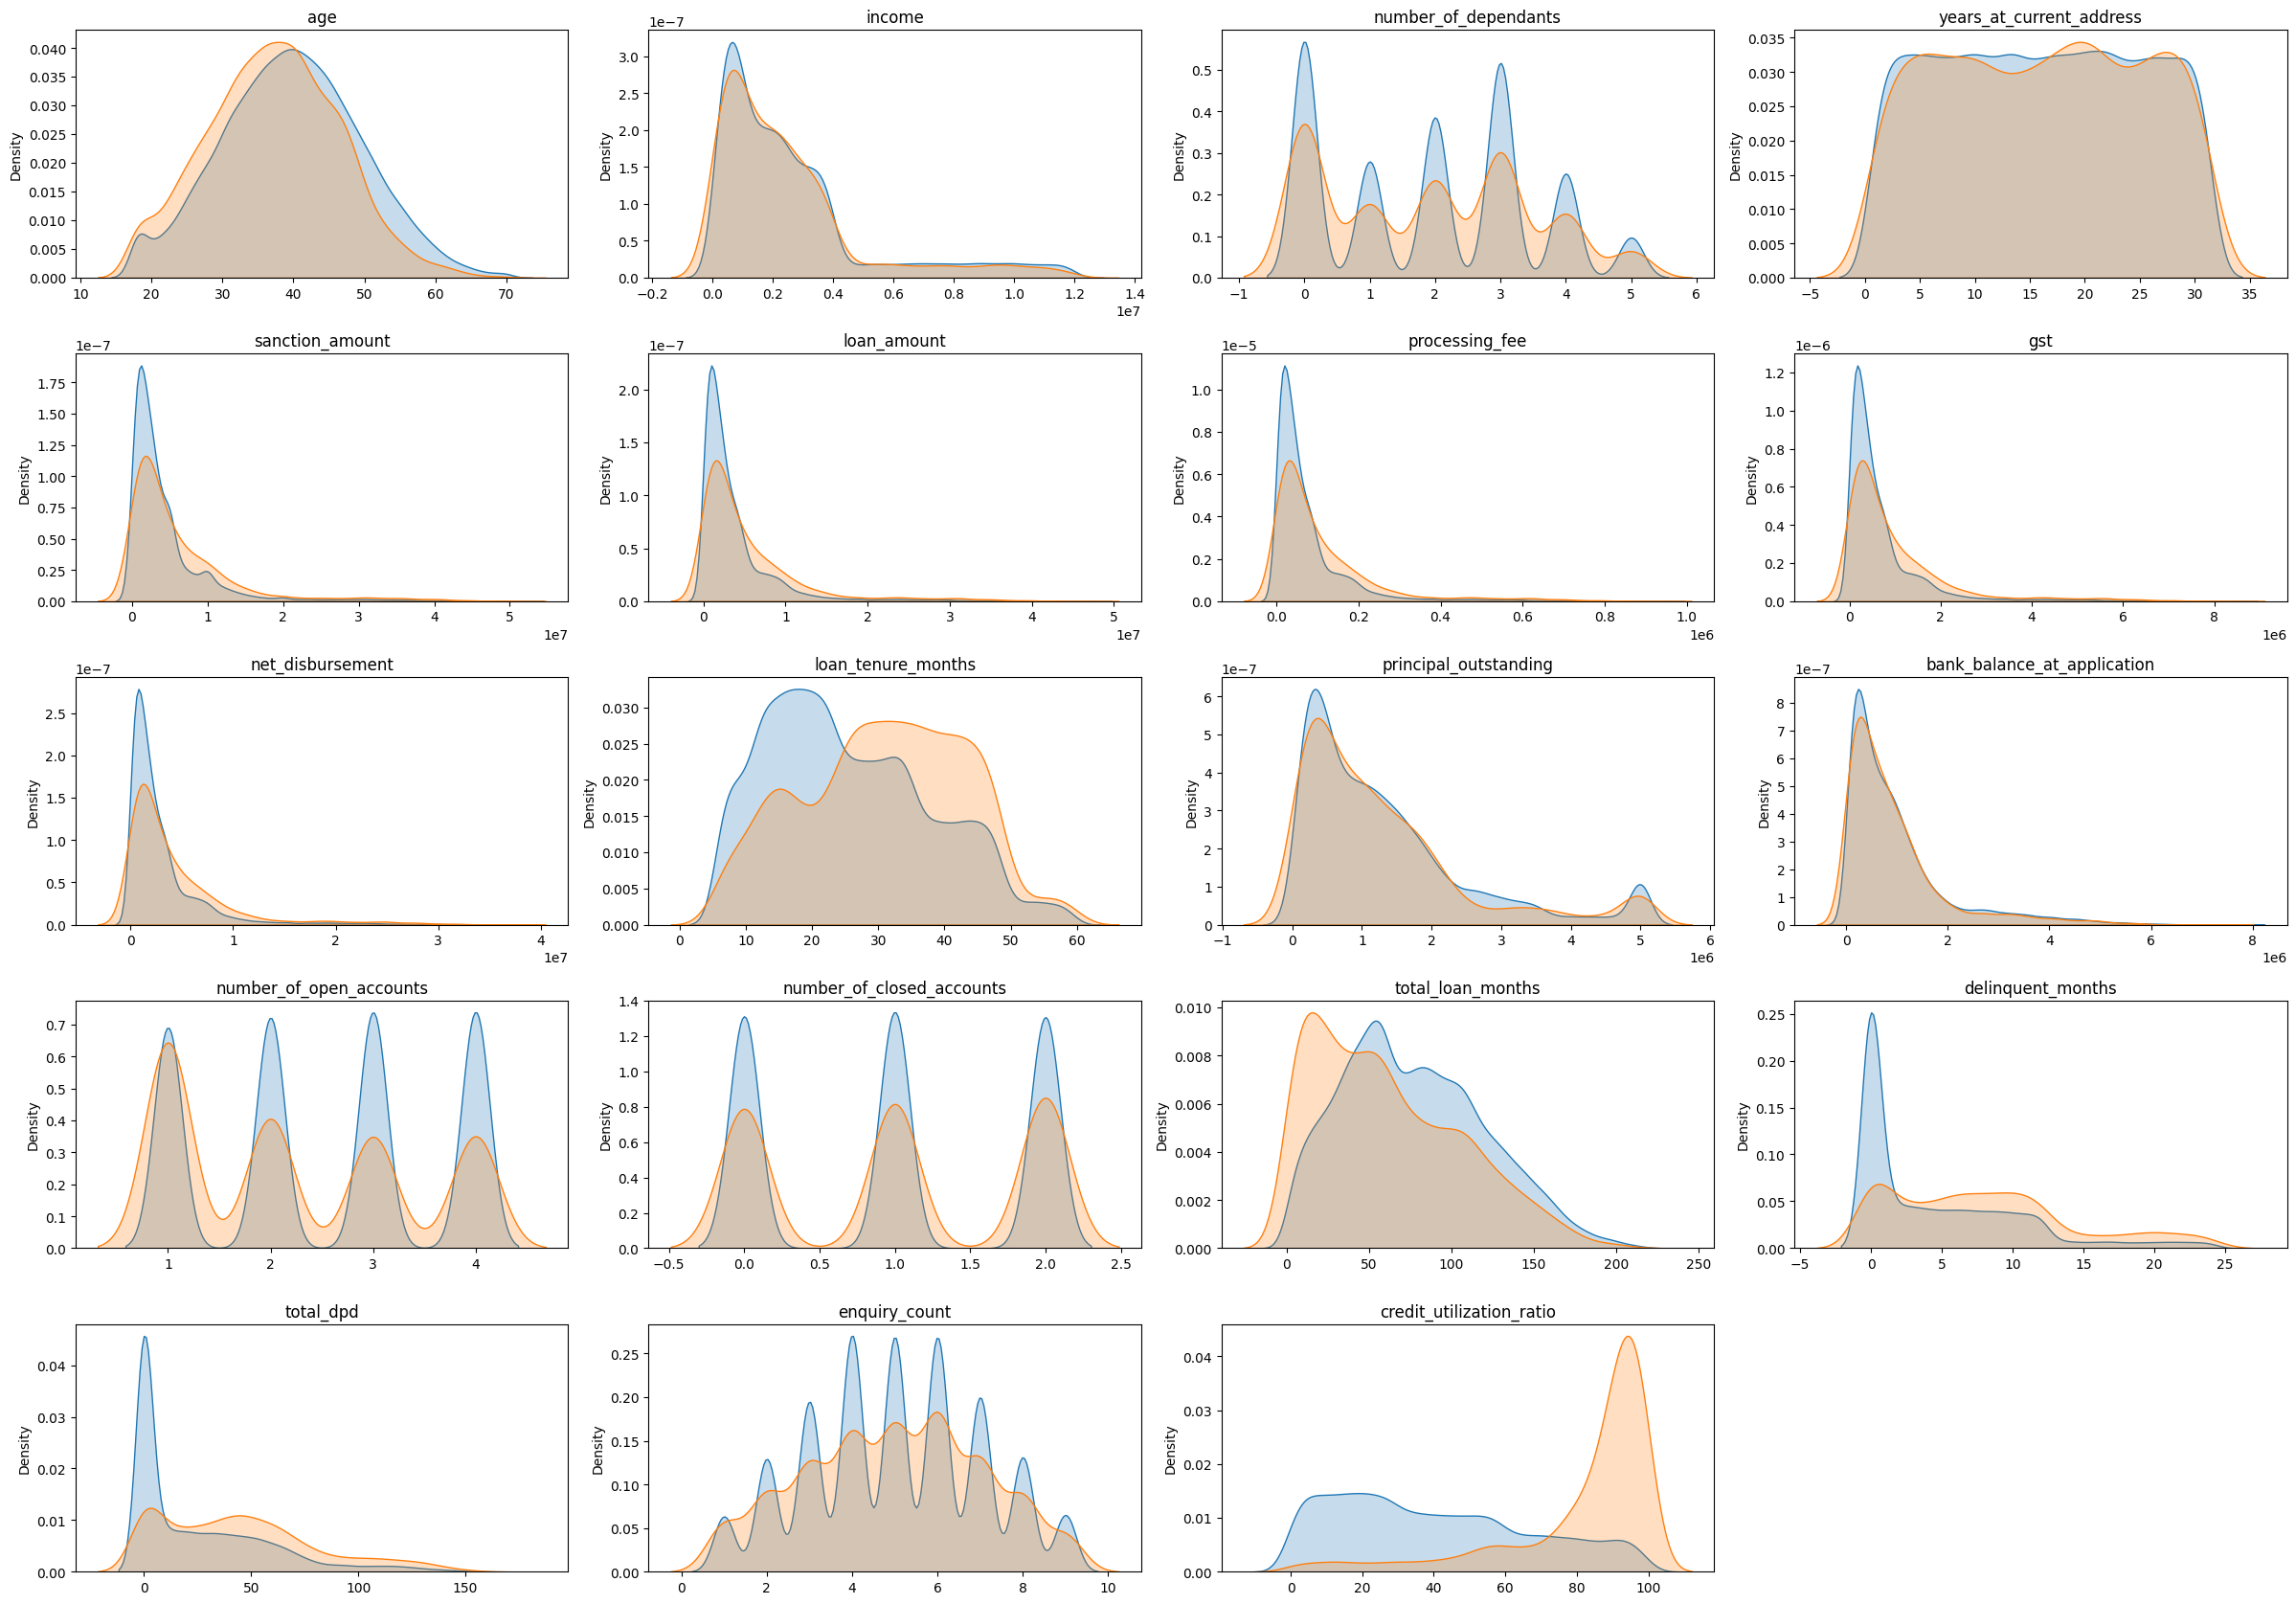

In [46]:
plt.figure(figsize=(24, 20))  # Width, height in inches

for i, col in enumerate(columns_continuous):
    plt.subplot(6, 4, i+1)  # 1 row, 4 columns, ith subplot
    sns.kdeplot(df_train_1[col][df_train_1['default']==0], fill=True, label='default=0')
    sns.kdeplot(df_train_1[col][df_train_1['default']==1], fill=True, label='default=1')
    plt.title(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()

**Insights**

1. In columns: loan_tenure_months, delinquent_months, total_dpd, credit_utilization, higher values indicate high likelyhood of becoming a default. Hence these 4 looks like strong predictors
1. In remaining columns the distributions do not give any obvious insights
1. Why loan_amount and income did not give any signs of being strong predictors? May be when we combine these two and get loan to income ratio (LTI), that may have influence on the target variable. We will explore more later

**<h3>Feature Engineering </h3>**

In [47]:
df_train_1['loan_to_income']=round(df_train_1['loan_amount']/df_train_1['income'],2)
df_test_1['loan_to_income']=round(df_test_1['loan_amount']/df_test_1['income'],2)
df_train_1['loan_to_income'][1]

np.float64(3.22)

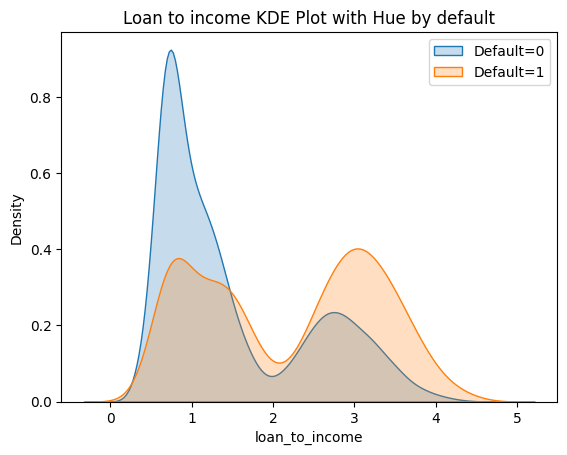

In [48]:
sns.kdeplot(df_train_1[df_train_1.default==0]['loan_to_income'],fill=True,label="Default=0")
sns.kdeplot(df_train_1[df_train_1.default==1]['loan_to_income'],fill=True,label="Default=1")
plt.title("Loan to income KDE Plot with Hue by default")
plt.legend()
plt.show()

In [49]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio', 'loan_id', 'loan_purpose', 'loan_type',
       'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'disbursal_date', 'installment_start_dt',
       'default', 'loan_to_income'],
      dtype='object')

In [50]:
df_train_1[['delinquent_months', 'total_loan_months']]

,delinquent_months,total_loan_months
12746,20,152
32495,10,160
43675,12,54
9040,0,76
13077,0,60
...,...,...
28515,0,40
5558,14,52
45236,11,130
49228,0,88


In [51]:
df_train_1['delinquent_ratio']=df_train_1['delinquent_months']*100/df_train_1['total_loan_months'].round(1)
df_test_1['delinquent_ratio']=df_test_1['delinquent_months']*100/df_test_1['total_loan_months'].round(1)
df_train_1[['delinquent_months','total_loan_months','delinquent_ratio']].head(4)

,delinquent_months,total_loan_months,delinquent_ratio
12746,20,152,13.16
32495,10,160,6.25
43675,12,54,22.22
9040,0,76,0.00


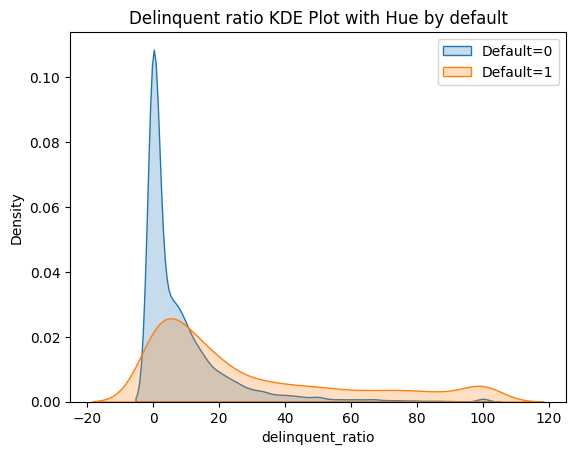

In [52]:
sns.kdeplot(df_train_1[df_train_1.default==0]['delinquent_ratio'],fill=True,label="Default=0")
sns.kdeplot(df_train_1[df_train_1.default==1]['delinquent_ratio'],fill=True,label="Default=1")
plt.title("Delinquent ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

In [53]:
df_train_1['total_dpd'].head()

,total_dpd
12746,118
32495,62
43675,67
9040,0
13077,0


In [54]:
df_train_1['average_dpd_per_delinquency']=df_train_1['total_dpd']/df_train_1['delinquent_months'].round(1)
df_train_1[['total_dpd','delinquent_months','average_dpd_per_delinquency']].head()

,total_dpd,delinquent_months,average_dpd_per_delinquency
12746,118,20,5.90
32495,62,10,6.20
43675,67,12,5.58
9040,0,0,NaN
13077,0,0,NaN


In [55]:
df_train_1['average_dpd_per_delinquency'].isna().sum()

np.int64(15088)

In [56]:
df_train_1['average_dpd_per_delinquency']=np.where(
    df_train_1['delinquent_months'] !=0,
    df_train_1['total_dpd']/df_train_1['delinquent_months'].round(1),
    0)
df_train_1[['total_dpd','delinquent_months','average_dpd_per_delinquency']].head()

,total_dpd,delinquent_months,average_dpd_per_delinquency
12746,118,20,5.90
32495,62,10,6.20
43675,67,12,5.58
9040,0,0,0.00
13077,0,0,0.00


In [57]:
df_train_1['average_dpd_per_delinquency'].isna().sum()

np.int64(0)

In [58]:
df_test_1['average_dpd_per_delinquency']=np.where(
    df_test_1['delinquent_months'] !=0,
    (df_test_1['total_dpd']/df_test_1['delinquent_months']).round(1),
    0
)
df_test_1[['total_dpd','delinquent_months','average_dpd_per_delinquency']].head()

,total_dpd,delinquent_months,average_dpd_per_delinquency
19205,0,0,0.00
15514,0,0,0.00
30367,0,0,0.00
35347,21,3,7.00
41814,89,14,6.40


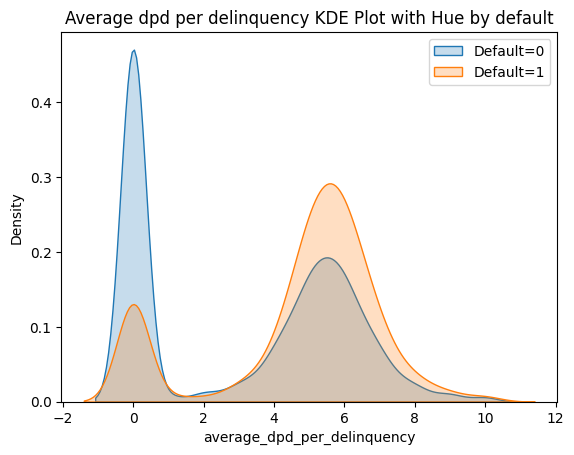

In [59]:
sns.kdeplot(df_train_1[df_train_1.default==0]['average_dpd_per_delinquency'],fill=True,label="Default=0")
sns.kdeplot(df_train_1[df_train_1.default==1]['average_dpd_per_delinquency'],fill=True,label="Default=1")
plt.title("Average dpd per delinquency KDE Plot with Hue by default")
plt.legend()
plt.show()

In [60]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio', 'loan_id', 'loan_purpose', 'loan_type',
       'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'disbursal_date', 'installment_start_dt',
       'default', 'loan_to_income', 'delinquent_ratio',
       'average_dpd_per_delinquency'],
      dtype='object')

**Feature Selection**

In [61]:
df_train_2 = df_train_1.drop(['cust_id', 'loan_id'],axis="columns")
df_test_2 = df_test_1.drop(['cust_id', 'loan_id'],axis="columns")

Remove Columns that business person asked to be removed

In [62]:
df_train_3 = df_train_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income',
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_test_3 = df_test_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income',
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'default', 'loan_to_income',
       'delinquent_ratio', 'average_dpd_per_delinquency'],
      dtype='object')

In [63]:
df_test_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'default', 'loan_to_income',
       'delinquent_ratio', 'average_dpd_per_delinquency'],
      dtype='object')

In [64]:
df_train_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37488 entries, 12746 to 37784
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37488 non-null  int64  
 1   gender                       37488 non-null  object 
 2   marital_status               37488 non-null  object 
 3   employment_status            37488 non-null  object 
 4   number_of_dependants         37488 non-null  int64  
 5   residence_type               37488 non-null  object 
 6   years_at_current_address     37488 non-null  int64  
 7   city                         37488 non-null  object 
 8   state                        37488 non-null  object 
 9   zipcode                      37488 non-null  int64  
 10  number_of_open_accounts      37488 non-null  int64  
 11  number_of_closed_accounts    37488 non-null  int64  
 12  enquiry_count                37488 non-null  int64  
 13  credit_utilizatio

In [65]:
df_train_3.select_dtypes(['int64','float64']).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'sanction_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'default', 'loan_to_income',
       'delinquent_ratio', 'average_dpd_per_delinquency'],
      dtype='object')

In [66]:
X_train=df_train_3.drop('default',axis=1)
y_train=df_train_3['default']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale=X_train.select_dtypes(['int64','float64']).columns

scaler=MinMaxScaler()
X_train[cols_to_scale]=scaler.fit_transform(X_train[cols_to_scale])
X_train.describe()

# X_train = df_train_3.drop('default', axis='columns')
# y_train = df_train_3['default']

# from sklearn.preprocessing import MinMaxScaler

# cols_to_scale = X_train.select_dtypes(['int64', 'float64']).columns

# scaler = MinMaxScaler()

# X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
# X_train.describe()


,age,number_of_dependants,years_at_current_address,zipcode,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,loan_to_income,delinquent_ratio,average_dpd_per_delinquency
count,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00
mean,0.41,0.39,0.50,0.52,0.50,0.50,0.50,0.44,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.29,0.10,0.33
std,0.19,0.31,0.30,0.29,0.37,0.41,0.25,0.30,0.12,0.11,0.11,0.11,0.23,0.24,0.13,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.00,0.00,0.38,0.18,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.11,0.00,0.00
50%,0.40,0.40,0.50,0.49,0.67,0.50,0.50,0.39,0.05,0.05,0.05,0.05,0.34,0.19,0.08,0.20,0.04,0.43
75%,0.54,0.60,0.77,0.76,1.00,1.00,0.62,0.68,0.10,0.10,0.10,0.10,0.55,0.35,0.16,0.51,0.13,0.57
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [67]:
X_test=df_test_3.drop('default',axis=1)
y_test=df_test_3['default']

X_test[cols_to_scale]=scaler.transform(X_test[cols_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,loan_to_income,delinquent_ratio,average_dpd_per_delinquency
count,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00
mean,0.42,0.38,0.50,0.53,0.50,0.50,0.50,0.44,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.29,0.11,0.33
std,0.19,0.31,0.30,0.29,0.37,0.41,0.25,0.30,0.12,0.11,0.11,0.11,0.23,0.25,0.13,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.00,0.00,0.38,0.18,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.11,0.00,0.00
50%,0.42,0.40,0.50,0.51,0.33,0.50,0.50,0.39,0.05,0.05,0.05,0.05,0.34,0.20,0.08,0.20,0.04,0.44
75%,0.54,0.60,0.77,0.76,0.67,1.00,0.62,0.68,0.10,0.09,0.09,0.09,0.55,0.36,0.16,0.50,0.13,0.58
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.98,0.96,0.96,0.96,1.00,1.00,0.94,1.00,1.00,1.00


In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [69]:
calculate_vif(X_train[cols_to_scale])

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.70
1,number_of_dependants,2.73
2,years_at_current_address,3.42
3,zipcode,3.80
4,number_of_open_accounts,4.39
5,number_of_closed_accounts,2.38
6,enquiry_count,6.41
7,credit_utilization_ratio,2.93
8,sanction_amount,101.09
9,processing_fee,inf


In [70]:
features_to_drop_vif = ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement','principal_outstanding']

X_train_1=X_train.drop(features_to_drop_vif,axis=1)
numeric_columns=X_train_1.select_dtypes(['int64','float64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_tenure_months',
       'bank_balance_at_application', 'loan_to_income', 'delinquent_ratio',
       'average_dpd_per_delinquency'],
      dtype='object')

In [71]:
calculate_vif(X_train_1[numeric_columns])

,Column,VIF
0,age,5.43
1,number_of_dependants,2.73
2,years_at_current_address,3.40
3,zipcode,3.78
4,number_of_open_accounts,4.35
5,number_of_closed_accounts,2.37
6,enquiry_count,6.38
7,credit_utilization_ratio,2.92
8,loan_tenure_months,6.02
9,bank_balance_at_application,1.80


In [72]:
selected_numeric_features_vif = numeric_columns
selected_numeric_features_vif

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_tenure_months',
       'bank_balance_at_application', 'loan_to_income', 'delinquent_ratio',
       'average_dpd_per_delinquency'],
      dtype='object')

In [73]:
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_tenure_months',
       'bank_balance_at_application', 'loan_to_income', 'delinquent_ratio',
       'average_dpd_per_delinquency'],
      dtype='object')

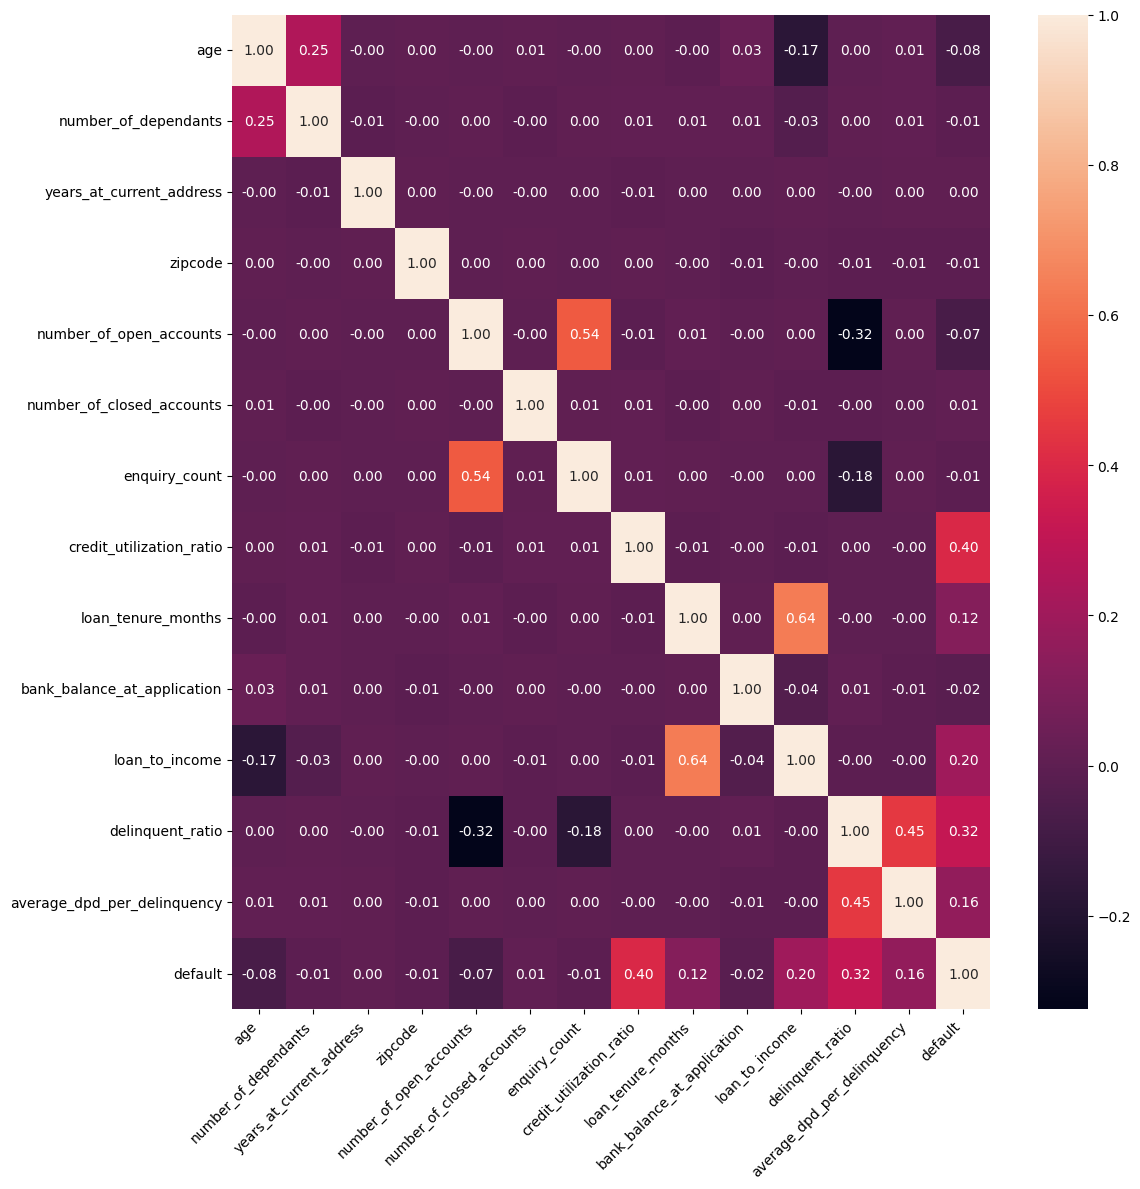

In [74]:
plt.figure(figsize=(12,12))
cm = df_train_3[numeric_columns.append(pd.Index(['default']))].corr()
sns.heatmap(cm, annot=True, fmt='0.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [75]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [76]:
def calculate_woe_iv(df,feature,target):
  grouped=df.groupby(feature)[target].agg(['count','sum'])
  grouped=grouped.rename(columns={'count':'total','sum':'good'})
  grouped['bad']=grouped['total']-grouped['good']

  total_good=grouped['good'].sum()
  total_bad=grouped['bad'].sum()

  grouped['good_pct']=grouped['good']/total_good
  grouped['bad_pct']=grouped['bad']/total_bad

  grouped['woe']=np.log(grouped['good_pct']/grouped['bad_pct'])
  grouped['iv']=(grouped['good_pct']-grouped['bad_pct'])*grouped['woe']

  grouped['woe']=grouped['woe'].replace([np.inf,-np.inf],0)
  grouped['iv']=grouped['iv'].replace([np.inf,-np.inf],0)

  total_iv=grouped['iv'].sum()


  return grouped,total_iv

grouped,total_iv=calculate_woe_iv(pd.concat([X_train_1,y_train],axis=1),'loan_purpose','default')
grouped


,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7447,327,7120,0.10,0.21,-0.72,0.08
Education,5620,559,5061,0.17,0.15,0.16,0.00
Home,11304,1734,9570,0.54,0.28,0.66,0.17
Personal,13117,603,12514,0.19,0.37,-0.67,0.12


In [77]:
total_iv

np.float64(0.3691197842282755)

In [78]:
X_train_1.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_purpose', 'loan_type',
       'loan_tenure_months', 'bank_balance_at_application', 'loan_to_income',
       'delinquent_ratio', 'average_dpd_per_delinquency'],
      dtype='object')

In [79]:
pd.cut(X_train_1['loan_to_income'],bins=10)

,loan_to_income
12746,"(0.4, 0.5]"
32495,"(0.3, 0.4]"
43675,"(0.7, 0.8]"
9040,"(0.1, 0.2]"
13077,"(-0.001, 0.1]"
...,...
28515,"(-0.001, 0.1]"
5558,"(0.1, 0.2]"
45236,"(0.7, 0.8]"
49228,"(0.2, 0.3]"


In [80]:
iv_values={}

for feature in X_train_1.columns:
  if X_train_1[feature].dtype=="object":
    _,iv=calculate_woe_iv(pd.concat([X_train_1,y_train],axis=1),feature,'default')
  else:
    X_binned=pd.cut(X_train_1[feature],bins=10,labels=False)
    _,iv=calculate_woe_iv(pd.concat([X_binned,y_train],axis=1),feature,'default')
  iv_values[feature]=iv
iv_values

{'age': np.float64(0.0890689462679479),
 'gender': np.float64(0.00047449502170914947),
 'marital_status': np.float64(0.001129766845390142),
 'employment_status': np.float64(0.003953046301722585),
 'number_of_dependants': np.float64(0.0019380899135053508),
 'residence_type': np.float64(0.246745268718145),
 'years_at_current_address': np.float64(0.0020800513608156363),
 'city': np.float64(0.0019059578709781529),
 'state': np.float64(0.0019005589806779287),
 'zipcode': np.float64(0.0016677413243392572),
 'number_of_open_accounts': np.float64(0.08463134083005877),
 'number_of_closed_accounts': np.float64(0.0011964272592421567),
 'enquiry_count': np.float64(0.007864214085342608),
 'credit_utilization_ratio': np.float64(2.352965568168245),
 'loan_purpose': np.float64(0.3691197842282755),
 'loan_type': np.float64(0.16319324904149224),
 'loan_tenure_months': np.float64(0.21893515090196278),
 'bank_balance_at_application': np.float64(0.0063187993277516365),
 'loan_to_income': np.float64(0.47641

In [81]:
pd.set_option('display.float_format',lambda x: '{:.3f}'.format(x))

iv_df=pd.DataFrame(list(iv_values.items()),columns=['Feature','IV'])
iv_df=iv_df.sort_values(by='IV',ascending=False)
iv_df

,Feature,IV
13,credit_utilization_ratio,2.353
19,delinquent_ratio,0.717
18,loan_to_income,0.476
20,average_dpd_per_delinquency,0.402
14,loan_purpose,0.369
5,residence_type,0.247
16,loan_tenure_months,0.219
15,loan_type,0.163
0,age,0.089
10,number_of_open_accounts,0.085


In [82]:
selected_iv=[feature for feature,iv in iv_values.items() if iv>0.02]
selected_iv

['age',
 'residence_type',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'loan_to_income',
 'delinquent_ratio',
 'average_dpd_per_delinquency']

**Feature Encoding**

In [83]:
X_train_reduced=X_train_1[selected_iv]
X_test_reduced=X_test[selected_iv]


In [84]:
X_train_reduced.head()

,age,residence_type,number_of_open_accounts,credit_utilization_ratio,loan_purpose,loan_type,loan_tenure_months,loan_to_income,delinquent_ratio,average_dpd_per_delinquency
12746,0.788,Owned,1.000,0.364,Home,Secured,0.415,0.415,0.132,0.590
32495,0.500,Owned,0.667,0.051,Education,Secured,0.830,0.307,0.062,0.620
43675,0.385,Mortgage,0.000,0.000,Home,Secured,0.491,0.759,0.222,0.558
9040,0.462,Mortgage,0.667,0.879,Education,Secured,0.642,0.194,0.000,0.000
13077,0.769,Owned,0.000,0.717,Personal,Unsecured,0.170,0.047,0.000,0.000


In [85]:
X_train_encoded=pd.get_dummies(X_train_reduced,drop_first=True)
X_test_encoded=pd.get_dummies(X_test_reduced,drop_first=True)

X_train_encoded.head()

,age,number_of_open_accounts,credit_utilization_ratio,loan_tenure_months,loan_to_income,delinquent_ratio,average_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
12746,0.788,1.000,0.364,0.415,0.415,0.132,0.590,True,False,False,True,False,False
32495,0.500,0.667,0.051,0.830,0.307,0.062,0.620,True,False,True,False,False,False
43675,0.385,0.000,0.000,0.491,0.759,0.222,0.558,False,False,False,True,False,False
9040,0.462,0.667,0.879,0.642,0.194,0.000,0.000,False,False,True,False,False,False
13077,0.769,0.000,0.717,0.170,0.047,0.000,0.000,True,False,False,False,True,True


# Model Training



Attempt 1


1.   Logistic Regression,Random Forest & XGB
2.   No handling of class imbalance



In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model=LogisticRegression()
model.fit(X_train_encoded,y_train)

y_pred=model.predict(X_test_encoded)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.72      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [87]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(X_train_encoded,y_train)

y_pred=model.predict(X_test_encoded)
report=classification_report(y_test,y_pred)
print(report)



              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.71      0.77      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [88]:
from xgboost import XGBClassifier

model=XGBClassifier()
model.fit(X_train_encoded,y_train)

y_pred=model.predict(X_test_encoded)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.81      0.75      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.89      0.87      0.88     12497
weighted avg       0.96      0.96      0.96     12497



#### RandomizedSearch CV for Attempt 1: Logistic Regression

In [89]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   # Algorithm to use in the optimization problem
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 5-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'newton-cg', 'C': np.float64(545.5594781168514)}
Best Score: 0.7578884658937152
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11423
           1       0.83      0.74      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.90      0.86      0.88     12497
weighted avg       0.96      0.96      0.96     12497



#### RandomizedSearch CV for Attempt 1: XGBoost

In [90]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 2, 'reg_lambda': 1.0, 'reg_alpha': 5.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best Score: 0.7869724445765535
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.77      0.84      0.80      1074

    accuracy                           0.96     12497
   macro avg       0.88      0.91      0.89     12497
weighted avg       0.97      0.96      0.96     12497



**Attempt 2**


1.   Logistic Regression & XGBoost
2.   Handle Class Imbalance Using Under Sampling



In [91]:
from imblearn.under_sampling import RandomUnderSampler

rus=RandomUnderSampler(random_state=42)
X_train_rus,y_train_rus=rus.fit_resample(X_train_encoded,y_train)
y_train_rus.value_counts()

,count
default,
0,3223
1,3223


In [92]:
model=LogisticRegression()
model.fit(X_train_rus,y_train_rus)

y_pred=model.predict(X_test_encoded)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.96      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.93      0.81     12497
weighted avg       0.95      0.92      0.93     12497



In [93]:
model=XGBClassifier(**random_search.best_params_)
model.fit(X_train_rus,y_train_rus)

y_pred=model.predict(X_test_encoded)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.99      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.76      0.95      0.81     12497
weighted avg       0.96      0.92      0.93     12497



**Attempt 3**


1.  Logistic Regression
2.  Handle Class Imbalance using SMOTE Tomek
3.  Parameter Tunning using Optuna



In [94]:
from imblearn.combine import SMOTETomek
smt=SMOTETomek(random_state=42)
X_train_smt,y_train_smt=smt.fit_resample(X_train_encoded,y_train)

y_train_smt.value_counts()

,count
default,
0,34197
1,34197


In [95]:
model=LogisticRegression()
model.fit(X_train_smt,y_train_smt)

y_pred=model.predict(X_test_encoded)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.55      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



# Model Fine Tunning using Optuna

In [96]:
%pip install Optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 15.2 MB/s eta 0:00:00


In [97]:
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

In [98]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  # Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  # Class weights
    }

    model = LogisticRegression(**param, max_iter=10000)

    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)

    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2025-08-05 13:29:19,362] A new study created in memory with name: no-name-c06c73e4-4d6e-4c99-844d-b642b3ba83a0
[I 2025-08-05 13:29:20,359] Trial 0 finished with value: 0.9441199242095631 and parameters: {'C': 0.43698443606939147, 'solver': 'liblinear', 'tol': 6.874964229028754e-05, 'class_weight': None}. Best is trial 0 with value: 0.9441199242095631.
[I 2025-08-05 13:29:20,772] Trial 1 finished with value: 0.929733589811379 and parameters: {'C': 33.59762077014008, 'solver': 'newton-cg', 'tol': 0.00811092791556442, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9441199242095631.
[I 2025-08-05 13:29:23,291] Trial 2 finished with value: 0.9456969777945984 and parameters: {'C': 30.71193918842852, 'solver': 'saga', 'tol': 7.192946969876402e-06, 'class_weight': None}. Best is trial 2 with value: 0.9456969777945984.
[I 2025-08-05 13:29:24,150] Trial 3 finished with value: 0.914408865243126 and parameters: {'C': 0.006293084667417632, 'solver': 'liblinear', 'tol': 7.160975286371

In [99]:
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9459148345278005
  Params: 
    C: 4.386882691110379
    solver: liblinear
    tol: 0.00034613682936273185
    class_weight: balanced
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



**Attempt 4**


1.   XGBoost
2.   Handle Class Imbalance using SMOTE Tomek
3.   Parameter Tuning using Optuna



In [100]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)

    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)

    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2025-08-05 13:30:28,768] A new study created in memory with name: no-name-f782b7b5-4b72-4abe-9fab-435c6cd8e4ae
[I 2025-08-05 13:30:31,809] Trial 0 finished with value: 0.9646547913719905 and parameters: {'lambda': 0.4592865877288651, 'alpha': 0.011824637826259013, 'subsample': 0.5526160359357988, 'colsample_bytree': 0.6336652964854838, 'max_depth': 7, 'eta': 0.2023369355228477, 'gamma': 7.035518560919901, 'scale_pos_weight': 4.228018648784532, 'min_child_weight': 5, 'max_delta_step': 5}. Best is trial 0 with value: 0.9646547913719905.
[I 2025-08-05 13:30:35,510] Trial 1 finished with value: 0.955723603375163 and parameters: {'lambda': 1.4245729494227293, 'alpha': 0.28554438087802786, 'subsample': 0.8674236847757153, 'colsample_bytree': 0.5676778221253125, 'max_depth': 4, 'eta': 0.19370715317405648, 'gamma': 1.8394792401183846, 'scale_pos_weight': 4.579307329525831, 'min_child_weight': 2, 'max_delta_step': 9}. Best is trial 0 with value: 0.9646547913719905.
[I 2025-08-05 13:30:39,437

In [101]:
print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

best_model_xgb = XGBClassifier(**study_xgb.best_params)
best_model_xgb.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_xgb.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9760143002921174
  Params: 
    lambda: 0.07831879225544029
    alpha: 0.008588945018933493
    subsample: 0.6761064362307079
    colsample_bytree: 0.8238648691695111
    max_depth: 10
    eta: 0.23137080768433554
    gamma: 0.8145625598884736
    scale_pos_weight: 4.197655596465305
    min_child_weight: 3
    max_delta_step: 1
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     11423
           1       0.70      0.87      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.84      0.92      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [102]:
y_pred=best_model_logistic.predict(X_test_encoded)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [103]:
from sklearn.metrics import roc_curve
probabilities=best_model_logistic.predict_proba(X_test_encoded)[:,1]

fpr,tpr,thresholds=roc_curve(y_test,probabilities)
fpr[:10],tpr[:10],thresholds[:10]

(array([0.        , 0.        , 0.        , 0.00008754, 0.00008754,
        0.00017509, 0.00017509, 0.00026263, 0.00026263, 0.00035017]),
 array([0.        , 0.0009311 , 0.16108007, 0.16108007, 0.17690875,
        0.17690875, 0.21880819, 0.21880819, 0.22998138, 0.22998138]),
 array([       inf, 1.        , 0.99943177, 0.99942738, 0.99929612,
        0.99927949, 0.99870872, 0.99870283, 0.99839589, 0.99839322]))

In [104]:
from sklearn.metrics import auc

area=auc(fpr,tpr)
print(area)

0.9836706008704383


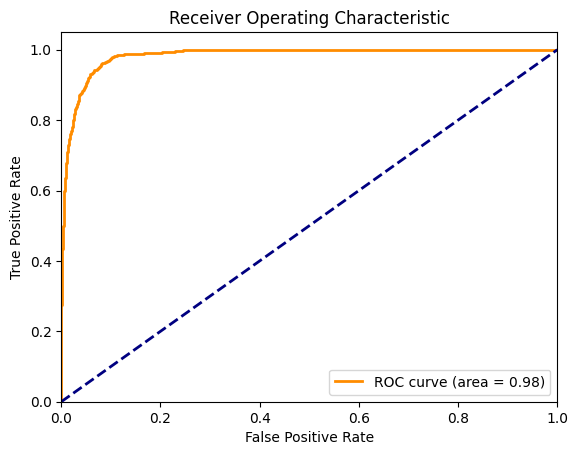

In [105]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Rank Ordering & K.S. Statistics

In [108]:
import pandas as pd
import numpy as np
from scipy import stats
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

df=pd.read_csv('data.csv')
df.head()

,Borrower Name,Default Probability,Default Truth
0,Priya Rao,0.32,0
1,Raj Patel,0.67,1
2,Meera Gupta,0.56,1
3,Linda Johnson,0.18,0
4,Aditi Sharma,0.75,1


In [109]:
df_sorted=df.sort_values('Default Probability',ascending=False)
df_sorted

,Borrower Name,Default Probability,Default Truth
4,Aditi Sharma,0.75,1
1,Raj Patel,0.67,1
12,Anil Kumar,0.62,0
2,Meera Gupta,0.56,1
13,Sarah Lee,0.52,1
5,John Smith,0.49,1
7,Emily Chen,0.44,0
9,Vivek Singh,0.39,0
0,Priya Rao,0.32,0
10,Michael Brown,0.28,0


In [110]:
df_sorted['Quartile']=pd.qcut(df_sorted['Default Probability'],q=4,labels=['Q1','Q2','Q3','Q4'])
df_sorted

,Borrower Name,Default Probability,Default Truth,Quartile
4,Aditi Sharma,0.75,1,Q4
1,Raj Patel,0.67,1,Q4
12,Anil Kumar,0.62,0,Q4
2,Meera Gupta,0.56,1,Q4
13,Sarah Lee,0.52,1,Q3
5,John Smith,0.49,1,Q3
7,Emily Chen,0.44,0,Q3
9,Vivek Singh,0.39,0,Q3
0,Priya Rao,0.32,0,Q2
10,Michael Brown,0.28,0,Q2


In [111]:
df_grouped=df_sorted.groupby('Quartile').apply(lambda x: pd.Series({
    "Minnimum Probability" : x['Default Probability'].min(),
    "Maximum Probability " : x['Default Probability'].max(),
    "Events" : x['Default Truth'].sum(),
    "Non Events" : x['Default Truth'].count() - x['Default Truth'].sum()
}))
df_grouped.reset_index(inplace=True)
df_grouped

/tmp/ipython-input-1016761370.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped=df_sorted.groupby('Quartile').apply(lambda x: pd.Series({
/tmp/ipython-input-1016761370.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped=df_sorted.groupby('Quartile').apply(lambda x: pd.Series({


,Quartile,Minnimum Probability,Maximum Probability,Events,Non Events
0,Q1,0.03,0.15,0.00,4.00
1,Q2,0.18,0.32,0.00,4.00
2,Q3,0.39,0.52,2.00,2.00
3,Q4,0.56,0.75,3.00,1.00


In [112]:
df_grouped.sort_values('Quartile',ascending=False,inplace=True)
df_grouped

,Quartile,Minnimum Probability,Maximum Probability,Events,Non Events
3,Q4,0.56,0.75,3.00,1.00
2,Q3,0.39,0.52,2.00,2.00
1,Q2,0.18,0.32,0.00,4.00
0,Q1,0.03,0.15,0.00,4.00


In [113]:
df_grouped['Event Rate'] = df_grouped['Events']*100 / (df_grouped['Events']+df_grouped['Non Events'])
df_grouped['Non-event Rate'] = df_grouped['Non Events']*100 / (df_grouped['Events']+df_grouped['Non Events'])
df_grouped

,Quartile,Minnimum Probability,Maximum Probability,Events,Non Events,Event Rate,Non-event Rate
3,Q4,0.56,0.75,3.00,1.00,75.00,25.00
2,Q3,0.39,0.52,2.00,2.00,50.00,50.00
1,Q2,0.18,0.32,0.00,4.00,0.00,100.00
0,Q1,0.03,0.15,0.00,4.00,0.00,100.00


In [114]:
df_grouped['Cum Events'] =  df_grouped['Events'].cumsum()
df_grouped['Cum Non-events'] =  df_grouped['Non Events'].cumsum()
df_grouped

,Quartile,Minnimum Probability,Maximum Probability,Events,Non Events,Event Rate,Non-event Rate,Cum Events,Cum Non-events
3,Q4,0.56,0.75,3.00,1.00,75.00,25.00,3.00,1.00
2,Q3,0.39,0.52,2.00,2.00,50.00,50.00,5.00,3.00
1,Q2,0.18,0.32,0.00,4.00,0.00,100.00,5.00,7.00
0,Q1,0.03,0.15,0.00,4.00,0.00,100.00,5.00,11.00


In [115]:
df_grouped['Cum Event Rate'] = df_grouped['Cum Events'] * 100 / df_grouped['Events'].sum()
df_grouped['Cum Non-event Rate'] = df_grouped['Cum Non-events']*100 / df_grouped['Non Events'].sum()
df_grouped

,Quartile,Minnimum Probability,Maximum Probability,Events,Non Events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate
3,Q4,0.56,0.75,3.00,1.00,75.00,25.00,3.00,1.00,60.00,9.09
2,Q3,0.39,0.52,2.00,2.00,50.00,50.00,5.00,3.00,100.00,27.27
1,Q2,0.18,0.32,0.00,4.00,0.00,100.00,5.00,7.00,100.00,63.64
0,Q1,0.03,0.15,0.00,4.00,0.00,100.00,5.00,11.00,100.00,100.00


In [116]:
df_grouped['KS'] = abs(df_grouped['Cum Event Rate'] - df_grouped['Cum Non-event Rate'])
df_grouped

,Quartile,Minnimum Probability,Maximum Probability,Events,Non Events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate,KS
3,Q4,0.56,0.75,3.00,1.00,75.00,25.00,3.00,1.00,60.00,9.09,50.91
2,Q3,0.39,0.52,2.00,2.00,50.00,50.00,5.00,3.00,100.00,27.27,72.73
1,Q2,0.18,0.32,0.00,4.00,0.00,100.00,5.00,7.00,100.00,63.64,36.36
0,Q1,0.03,0.15,0.00,4.00,0.00,100.00,5.00,11.00,100.00,100.00,0.00


# Model Evaluation Using KS Statistics & Gini Coefficient

In [117]:
pd.set_option('display.float_format',lambda x: '{:.3f}'.format(x))

probabilities=best_model_logistic.predict_proba(X_test_encoded)[:,1]

df_eval=pd.DataFrame({
    'Default Truth' : y_test,
    'Default Probability' : probabilities
})
df_eval.head()

,Default Truth,Default Probability
19205,0,0.533
15514,0,0.000
30367,0,0.006
35347,0,0.007
41814,1,0.922


In [118]:
# Here instead of Quartiles we are using Deciles.
# Higher value of predicted probability will have higher Decile.
df_eval['Decile']=pd.qcut(df_eval['Default Probability'],10,labels=False,duplicates='drop')
df_eval.head()

,Default Truth,Default Probability,Decile
19205,0,0.533,8
15514,0,0.000,2
30367,0,0.006,6
35347,0,0.007,6
41814,1,0.922,9


In [119]:
df_eval[df_eval.Decile==8]['Default Probability'].describe()

,Default Probability
count,1250.000
mean,0.486
std,0.181
min,0.215
25%,0.319
50%,0.468
75%,0.642
max,0.818


In [120]:
df_decile=df_eval.groupby('Decile').apply(lambda x: pd.Series({
    "Minnimum Probability" : x['Default Probability'].min(),
    "Maximum Probability" : x['Default Probability'].max(),
    "Events" : x['Default Truth'].sum(),
    "Non Events" : x['Default Truth'].count() - x['Default Truth'].sum()
}))
df_decile.reset_index(inplace=True)
df_decile

/tmp/ipython-input-1433992727.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_decile=df_eval.groupby('Decile').apply(lambda x: pd.Series({


,Decile,Minnimum Probability,Maximum Probability,Events,Non Events
0,0,0.000,0.000,0.000,1250.000
1,1,0.000,0.000,0.000,1250.000
2,2,0.000,0.000,0.000,1249.000
3,3,0.000,0.000,0.000,1250.000
4,4,0.000,0.001,0.000,1250.000
5,5,0.001,0.005,0.000,1249.000
6,6,0.005,0.030,5.000,1245.000
7,7,0.030,0.215,9.000,1240.000
8,8,0.215,0.818,162.000,1088.000
9,9,0.818,1.000,898.000,352.000


In [121]:
df_decile.sort_values(by='Decile',ascending=False,inplace=True)
df_decile

,Decile,Minnimum Probability,Maximum Probability,Events,Non Events
9,9,0.818,1.000,898.000,352.000
8,8,0.215,0.818,162.000,1088.000
7,7,0.030,0.215,9.000,1240.000
6,6,0.005,0.030,5.000,1245.000
5,5,0.001,0.005,0.000,1249.000
4,4,0.000,0.001,0.000,1250.000
3,3,0.000,0.000,0.000,1250.000
2,2,0.000,0.000,0.000,1249.000
1,1,0.000,0.000,0.000,1250.000
0,0,0.000,0.000,0.000,1250.000


In [122]:
df_decile['Event Rate']=(df_decile['Events']*100)/(df_decile['Events']+df_decile['Non Events'])
df_decile['Non Event Rate']=(df_decile['Non Events']*100)/(df_decile['Events']+df_decile['Non Events'])
df_decile

,Decile,Minnimum Probability,Maximum Probability,Events,Non Events,Event Rate,Non Event Rate
9,9,0.818,1.000,898.000,352.000,71.840,28.160
8,8,0.215,0.818,162.000,1088.000,12.960,87.040
7,7,0.030,0.215,9.000,1240.000,0.721,99.279
6,6,0.005,0.030,5.000,1245.000,0.400,99.600
5,5,0.001,0.005,0.000,1249.000,0.000,100.000
4,4,0.000,0.001,0.000,1250.000,0.000,100.000
3,3,0.000,0.000,0.000,1250.000,0.000,100.000
2,2,0.000,0.000,0.000,1249.000,0.000,100.000
1,1,0.000,0.000,0.000,1250.000,0.000,100.000
0,0,0.000,0.000,0.000,1250.000,0.000,100.000


In [123]:
df_decile = df_decile.sort_values(by='Decile', ascending=False).reset_index(drop=True)
df_decile

,Decile,Minnimum Probability,Maximum Probability,Events,Non Events,Event Rate,Non Event Rate
0,9,0.818,1.000,898.000,352.000,71.840,28.160
1,8,0.215,0.818,162.000,1088.000,12.960,87.040
2,7,0.030,0.215,9.000,1240.000,0.721,99.279
3,6,0.005,0.030,5.000,1245.000,0.400,99.600
4,5,0.001,0.005,0.000,1249.000,0.000,100.000
5,4,0.000,0.001,0.000,1250.000,0.000,100.000
6,3,0.000,0.000,0.000,1250.000,0.000,100.000
7,2,0.000,0.000,0.000,1249.000,0.000,100.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000


In [124]:
df_decile['Cum Events']=df_decile['Events'].cumsum()
df_decile['Cum Non Events']=df_decile['Non Events'].cumsum()
df_decile

,Decile,Minnimum Probability,Maximum Probability,Events,Non Events,Event Rate,Non Event Rate,Cum Events,Cum Non Events
0,9,0.818,1.000,898.000,352.000,71.840,28.160,898.000,352.000
1,8,0.215,0.818,162.000,1088.000,12.960,87.040,1060.000,1440.000
2,7,0.030,0.215,9.000,1240.000,0.721,99.279,1069.000,2680.000
3,6,0.005,0.030,5.000,1245.000,0.400,99.600,1074.000,3925.000
4,5,0.001,0.005,0.000,1249.000,0.000,100.000,1074.000,5174.000
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000


In [125]:
df_decile['Cum Event Rate'] = df_decile['Cum Events'] * 100 / df_decile['Events'].sum()
df_decile['Cum Non-event Rate'] = df_decile['Cum Non Events']*100 / df_decile['Non Events'].sum()
df_decile

,Decile,Minnimum Probability,Maximum Probability,Events,Non Events,Event Rate,Non Event Rate,Cum Events,Cum Non Events,Cum Event Rate,Cum Non-event Rate
0,9,0.818,1.000,898.000,352.000,71.840,28.160,898.000,352.000,83.613,3.082
1,8,0.215,0.818,162.000,1088.000,12.960,87.040,1060.000,1440.000,98.696,12.606
2,7,0.030,0.215,9.000,1240.000,0.721,99.279,1069.000,2680.000,99.534,23.461
3,6,0.005,0.030,5.000,1245.000,0.400,99.600,1074.000,3925.000,100.000,34.361
4,5,0.001,0.005,0.000,1249.000,0.000,100.000,1074.000,5174.000,100.000,45.295
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000,100.000,56.237
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000,100.000,67.180
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000,100.000,78.114
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000,100.000,89.057
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000,100.000,100.000


In [126]:
df_decile['KS'] = abs(df_decile['Cum Event Rate'] - df_decile['Cum Non-event Rate'])
df_decile

,Decile,Minnimum Probability,Maximum Probability,Events,Non Events,Event Rate,Non Event Rate,Cum Events,Cum Non Events,Cum Event Rate,Cum Non-event Rate,KS
0,9,0.818,1.000,898.000,352.000,71.840,28.160,898.000,352.000,83.613,3.082,80.531
1,8,0.215,0.818,162.000,1088.000,12.960,87.040,1060.000,1440.000,98.696,12.606,86.090
2,7,0.030,0.215,9.000,1240.000,0.721,99.279,1069.000,2680.000,99.534,23.461,76.073
3,6,0.005,0.030,5.000,1245.000,0.400,99.600,1074.000,3925.000,100.000,34.361,65.639
4,5,0.001,0.005,0.000,1249.000,0.000,100.000,1074.000,5174.000,100.000,45.295,54.705
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000,100.000,56.237,43.763
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000,100.000,67.180,32.820
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000,100.000,78.114,21.886
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000,100.000,89.057,10.943
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000,100.000,100.000,0.000


In [127]:
gini_coefficient=2 * area - 1

print("AUC : ",area)
print("Gini Coefficient : ",gini_coefficient)

AUC :  0.9836706008704383
Gini Coefficient :  0.9673412017408767


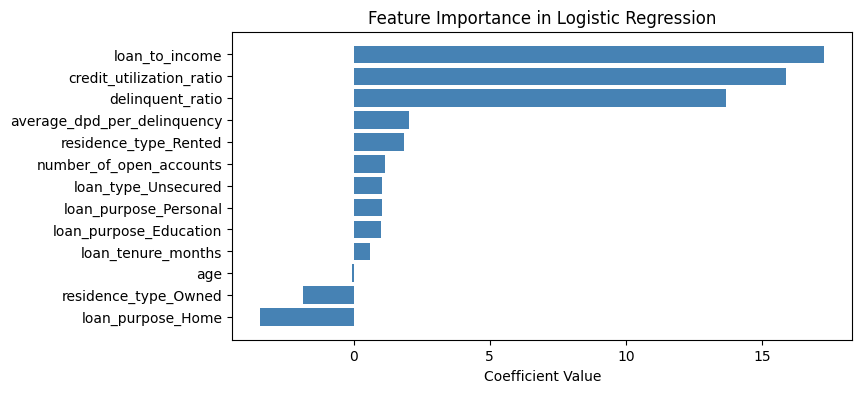

In [128]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

# Save The Model

In [129]:
X_test_encoded.head(2)

,age,number_of_open_accounts,credit_utilization_ratio,loan_tenure_months,loan_to_income,delinquent_ratio,average_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
19205,0.346,0.333,0.990,0.755,0.550,0.000,0.000,True,False,False,True,False,False
15514,0.481,1.000,0.323,0.226,0.220,0.000,0.000,True,False,True,False,False,False


In [130]:
X_test_encoded.columns

Index(['age', 'number_of_open_accounts', 'credit_utilization_ratio',
       'loan_tenure_months', 'loan_to_income', 'delinquent_ratio',
       'average_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [131]:
cols_to_scale

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'sanction_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'loan_to_income', 'delinquent_ratio',
       'average_dpd_per_delinquency'],
      dtype='object')

In [132]:
X_train_encoded.columns

Index(['age', 'number_of_open_accounts', 'credit_utilization_ratio',
       'loan_tenure_months', 'loan_to_income', 'delinquent_ratio',
       'average_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [134]:
from joblib import dump
import os

model_data={
    'model' : final_model,
    'features' : X_train_encoded.columns,
    'scaler' : scaler,
    'cols_to_scale' : cols_to_scale
}

os.mkdir("artifacts")

dump(model_data,"artifacts/model_data.joblib")

['artifacts/model_data.joblib']

In [135]:
print("Numpy",np.__version__)
print("Scikit Learn ",sklearn.__version__) # Added the alias

Numpy 2.0.2
Scikit Learn  1.6.1
